###  auto_mpg에 들어있는 컬럼에 따른 mpg 예측 - 다항회귀
- 데이터셋 : auto_mpg.csv
- 학습종류 : 지도학습 / 다항회귀Regression - 값을 예측
- 알고리즘 : lineregression
- 피쳐 : corr이 가장 높은 weight
- 타겟:  mpg

In [3]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
from sklearn.preprocessing import MinMaxScaler
                            ## 정규화

In [20]:
mpgDF = pd.DataFrame(pd.read_csv('../data/auto_mpg.csv',usecols=[0,4],engine='python'))

In [21]:
mpgDF.shape

(404, 2)

In [22]:
mpgDF.head()

,mpg,weight
0,18.0,3504.0
1,15.0,3693.0
2,18.0,3436.0
3,16.0,3433.0
4,17.0,3449.0


In [50]:
mpgDF.isna().sum()

mpg       0
weight    2
dtype: int64

In [51]:
mpgDF['weight']=mpgDF['weight'].ffill()

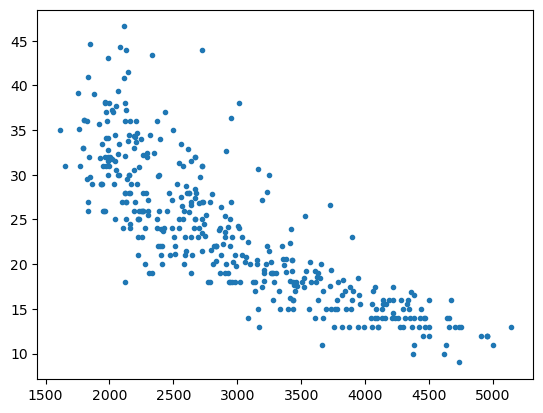

In [52]:
plt.plot(mpgDF['weight'],mpgDF['mpg'], '.')
# plt.set_title(mpgDF.columns[i+1]+ str(f"{mpgDF['acceleration'].corr(mpgDF['mpg']):.2f}"))
    


mpg와 연관성 있는 데이터.
- cylinder, displacement, horsepower, weight

In [53]:
feature = mpgDF[['weight']]
target = mpgDF['mpg']

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [54]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [55]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=303)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (303, 1) / X_test => 2D, (101, 1)
y_train => 1D (303,) / y_test => 2D, (101,)


[4] 학습 진행

In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [-0.00761021]
lr.intercept_ 46.18623918118233
X_train = -0.007610206388284046*y_train + 46.18623918118233


[5] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [62]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.6791971084529387, 0.6889023708388686],
 'r2score': [0.6791971084529387, 0.6889023708388686],
 'rmse': [4.483773933110146, 4.231941163987443],
 'mse': [20.104228683238023, 17.909326015451395],
 'mae': [3.3731450799313882, 3.214125713852952]}

In [63]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
# 3번쨰 차이 열 추가
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6792,0.6792,4.4838,20.1042,3.3731
test,0.6889,0.6889,4.2319,17.9093,3.2141
diff,0.0097,0.0097,0.2518,2.1949,0.1590


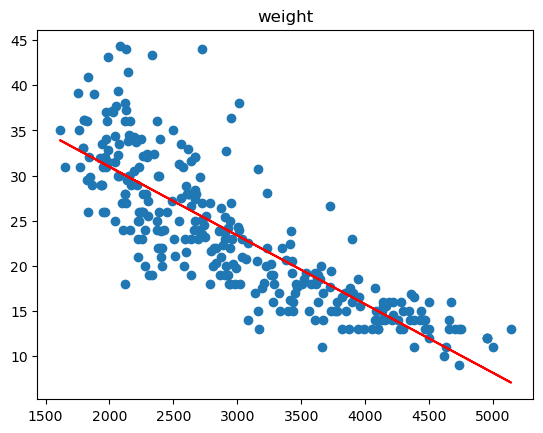

In [67]:
y = X_train*lr.coef_[0]+lr.intercept_
plt.plot(X_train, y_train, 'o', label='Fish')
plt.plot(X_train,y, 'r-', label='Poly Line')
plt.title('weight')

plt.show()

결과분석
- test 점수가 더 높지만, 점수 자체가 낮음
- => 과소적합

해결방안
- 컬럼 생성하여 다항으로 
- 곡선분포로 보임

[6] 특성공학 - 피처 생성 추가


In [78]:
## [6-1] 모듈로딩
from sklearn.preprocessing import PolynomialFeatures

In [79]:
# x-train, x-test
poly = PolynomialFeatures() 

poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test  = poly.transform(X_test)

In [80]:
print(f'학습용 {type(poly_train)}, {poly_train.shape}')
print(f'테스트용 {type(poly_test)}, {poly_test.shape}')

학습용 <class 'numpy.ndarray'>, (303, 3)
테스트용 <class 'numpy.ndarray'>, (101, 3)


[7] 재학습 <hr>

In [81]:
## - 선형회귀인스턴스 생성
polyModel = LinearRegression()
## - 학습
polyModel.fit(poly_train, y_train)

LinearRegression()

In [82]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"polyModel.coef_ {polyModel.coef_}")
print(f"polyModel.intercept_ {polyModel.intercept_}")
print(f"X_train = {polyModel.coef_[0]}*y_train + {polyModel.intercept_}")

polyModel.coef_ [ 0.00000000e+00 -1.73965256e-02  1.52525331e-06]
polyModel.intercept_ 60.68700538041194
X_train = 0.0*y_train + 60.68700538041194


In [83]:
print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )
min_x, max_x = X_train.min().values[0], X_train.max().values[0]
# minmax 해서 0~1
## - 곡선 회귀식에 대입할 데이터 
x=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
print(x)

min : 1613.0 max : 5140.0
shape : (50,)
[1613.         1684.97959184 1756.95918367 1828.93877551 1900.91836735
 1972.89795918 2044.87755102 2116.85714286 2188.83673469 2260.81632653
 2332.79591837 2404.7755102  2476.75510204 2548.73469388 2620.71428571
 2692.69387755 2764.67346939 2836.65306122 2908.63265306 2980.6122449
 3052.59183673 3124.57142857 3196.55102041 3268.53061224 3340.51020408
 3412.48979592 3484.46938776 3556.44897959 3628.42857143 3700.40816327
 3772.3877551  3844.36734694 3916.34693878 3988.32653061 4060.30612245
 4132.28571429 4204.26530612 4276.24489796 4348.2244898  4420.20408163
 4492.18367347 4564.16326531 4636.14285714 4708.12244898 4780.10204082
 4852.08163265 4924.06122449 4996.04081633 5068.02040816 5140.        ]


In [84]:
## - 곡선 회귀식 : y = x^0*W0 + x^1*W1 x^2*W2 + b
y = (1*polyModel.coef_[0]) + (x * polyModel.coef_[1]) + ((x**2)*polyModel.coef_[2]) + polyModel.intercept_

print('shape :' , y.shape)
print(y)

shape : (50,)
[36.5947663  35.70464714 34.83033284 33.9718234  33.12911882 32.30221911
 31.49112426 30.69583427 29.91634914 29.15266888 28.40479348 27.67272295
 26.95645727 26.25599646 25.57134051 24.90248943 24.2494432  23.61220184
 22.99076535 22.38513371 21.79530694 21.22128503 20.66306798 20.1206558
 19.59404848 19.08324602 18.58824843 18.1090557  17.64566783 17.19808482
 16.76630668 16.3503334  15.95016498 15.56580142 15.19724273 14.8444889
 14.50753993 14.18639583 13.88105659 13.59152221 13.31779269 13.05986804
 12.81774825 12.59143332 12.38092326 12.18621806 12.00731772 11.84422224
 11.69693163 11.56544588]


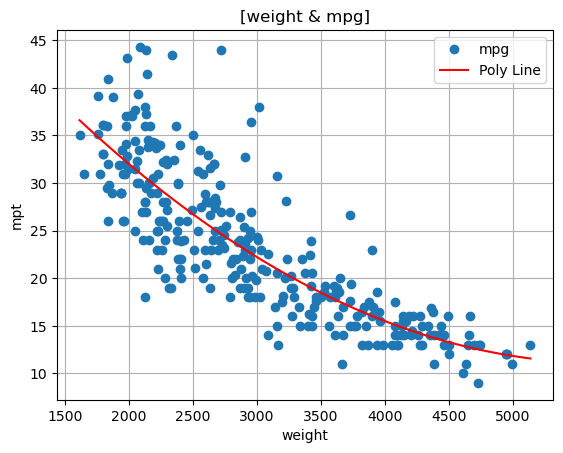

In [85]:
## 시각화 및 회귀선 -----------------------------------
## 데이터 시각화
plt.plot(X_train, y_train, 'o', label='mpg')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Poly Line')

plt.xlabel('weight')
plt.ylabel('mpt')
plt.title('[weight & mpg]')
plt.legend()
plt.grid()
plt.show()

In [86]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[poly_train, y_train], [poly_test, y_test]]:
    score = polyModel.score(x, y)
    pre_y = polyModel.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.6978658926941447, 0.7138754786798152],
 'r2score': [0.6978658926941447, 0.7138754786798152],
 'rmse': [4.351354318408021, 4.058530462057814],
 'mse': [18.93428440432813, 16.471669511451218],
 'mae': [3.16871220414934, 2.9953111466217424]}

In [87]:
resultDF2 = pd.DataFrame(r_dict, index=['ptrain', 'ptest'])
resultDF2.loc['diff'] = (resultDF2.loc['ptrain']-resultDF2.loc['ptest']).abs()
resultDF2.round(4)

,score,r2score,rmse,mse,mae
ptrain,0.6979,0.6979,4.3514,18.9343,3.1687
ptest,0.7139,0.7139,4.0585,16.4717,2.9953
diff,0.0160,0.0160,0.2928,2.4626,0.1734


In [88]:
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6792,0.6792,4.4838,20.1042,3.3731
test,0.6889,0.6889,4.2319,17.9093,3.2141
diff,0.0097,0.0097,0.2518,2.1949,0.1590


In [ ]:
## 과소적합